# PyTorch Logistic Regression example

### Moshe Wasserblat <br><br> March 2020

In [0]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_regression
from collections import Counter

### Input feature and data

Counter({0.0: 500, 1.0: 500})


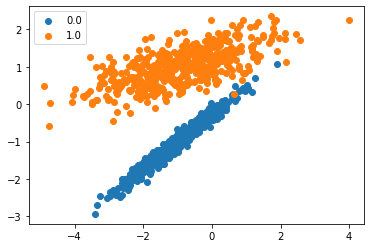

torch.Size([1000, 2])

In [87]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.50], flip_y=0, random_state=4)
X = X.astype(np.float32)
y = y.astype(np.float32)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

X = torch.from_numpy(X)
y = torch.from_numpy(y)

X.shape


### Model Arch

In [0]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        #Inputs with linear transformation
        self.output = torch.nn.Linear(2, 1)
        # Activation function for the output layer - sigmoid
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        out = self.output(x)
        out = self.sigmoid(out)
        return out

### Init

In [89]:
learningRate = 0.1 
epochs = 1000
running_loss = []

model = LogisticRegression()
print(model)

LogisticRegression(
  (output): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


### Define loss & optimizer

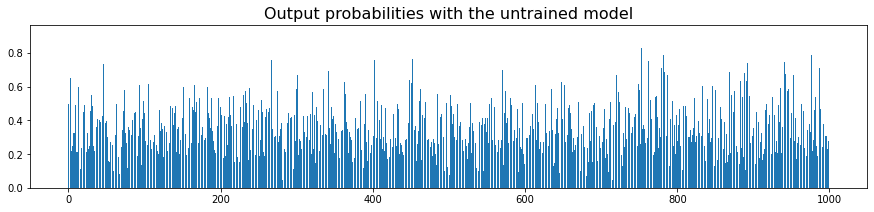

0.7748286128044128


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


In [91]:
criterion = torch.nn.BCELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)


logits_numpy = model.forward(X).detach().numpy().flatten()
plt.figure(figsize=(15,3))
plt.title("Output probabilities with the untrained model",fontsize=16)
plt.bar([i for i in range(1000)],height=logits_numpy)
plt.show()

logits = model.forward(X) # Output of the forward pass (logits i.e. probabilities)
loss = criterion(logits,y)
print(loss.item())


### Training: 1. Reset the gradients 2. Forward pass 3. Calc loss 4. Backward pass 5. One step of the optimizer

In [92]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    inputs = Variable(X)
    labels = Variable(y)

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model.forward(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    # for print loss vs. epoch
    running_loss.append(loss.item())

    print('epoch {}, loss {}'.format(epoch, round(loss.item(),5)))



/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


tensor(0.7748, grad_fn=<BinaryCrossEntropyBackward>)
epoch 0, loss 0.77483
tensor(0.7472, grad_fn=<BinaryCrossEntropyBackward>)
epoch 1, loss 0.7472
tensor(0.7210, grad_fn=<BinaryCrossEntropyBackward>)
epoch 2, loss 0.721
tensor(0.6962, grad_fn=<BinaryCrossEntropyBackward>)
epoch 3, loss 0.69617
tensor(0.6727, grad_fn=<BinaryCrossEntropyBackward>)
epoch 4, loss 0.67269
tensor(0.6505, grad_fn=<BinaryCrossEntropyBackward>)
epoch 5, loss 0.65049
tensor(0.6295, grad_fn=<BinaryCrossEntropyBackward>)
epoch 6, loss 0.62953
tensor(0.6097, grad_fn=<BinaryCrossEntropyBackward>)
epoch 7, loss 0.60974
tensor(0.5911, grad_fn=<BinaryCrossEntropyBackward>)
epoch 8, loss 0.59108
tensor(0.5735, grad_fn=<BinaryCrossEntropyBackward>)
epoch 9, loss 0.57347
tensor(0.5569, grad_fn=<BinaryCrossEntropyBackward>)
epoch 10, loss 0.55686
tensor(0.5412, grad_fn=<BinaryCrossEntropyBackward>)
epoch 11, loss 0.54119
tensor(0.5264, grad_fn=<BinaryCrossEntropyBackward>)
epoch 12, loss 0.52641
tensor(0.5124, grad_fn=<B

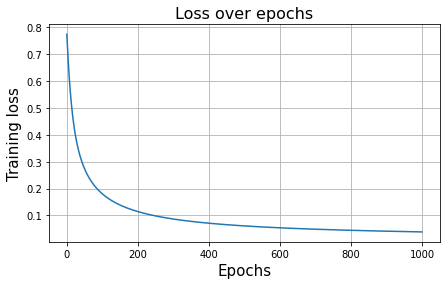

In [93]:
plt.figure(figsize=(7,4))
plt.title("Loss over epochs",fontsize=16)
#plt.plot([e for e in range(epochs)],running_loss)
plt.plot(running_loss)
plt.grid(True)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.show()

### Test
